In [21]:
import os
print(os.listdir("input_house_price"))
print(os.listdir())

['candles.csv', 'sample_submission.csv', 'train.csv', 'test.csv', 'data_description.txt']
['iss_simple_client.py', '1mailru.ipynb', 'iss_simple_main.py', 'proo_down_data.ipynb', 'Untitled1.ipynb', 'emitents_list.csv', 'submission.csv', 'proobase.db', '1my_lib.ipynb', 'fork-of-exercise-xgboost-bd7104.ipynb', 'population.db', 'mailru_data', 'data.json', '.ipynb_checkpoints', 'sample_submission.csv', 'docker_comand.txt', 'Untitled.ipynb', 'data.csv', 'proo1.ipynb', 'train.csv', '1_house_prices.ipynb', 'proo_main_analis.ipynb', '.git', 'Untitled2.ipynb', 'input_house_price', 'next_step.ipynb', 'emitents.csv', 'proo.ipynb', 'good_links.txt', 'my_sqlite.ipynb', 'data_columns.csv', 'iss-api-rus-v14.pdf', 'api_sklearn.pdf', 'myml210819.zip', 'docker_string.txt', 'train_1550.csv']


In [22]:
from time import time
tik = time()
tik_local = time()

def mytime(tik_local):
    tak = time()
    print('all time is - ', tak-tik, '(sec)')
    print('local time is - ', tak-tik_local, '(sec)')
    return tak

tik_local = mytime(tik_local)

all time is -  0.0005555152893066406 (sec)
local time is -  0.00042247772216796875 (sec)


The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


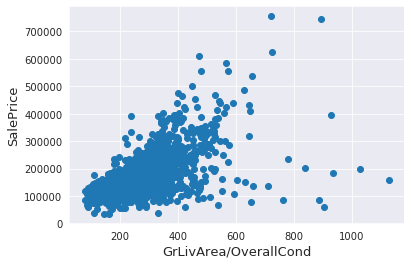

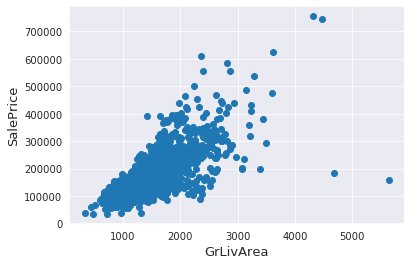

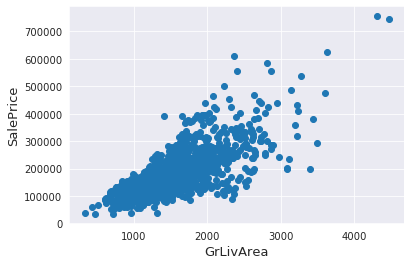

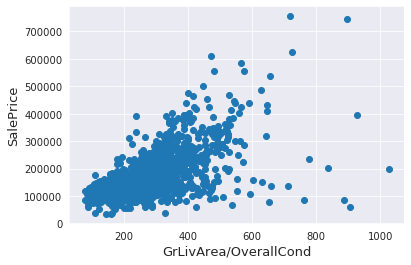


 mu = 180932.92 and sigma = 79467.79



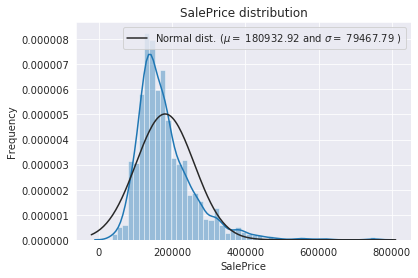

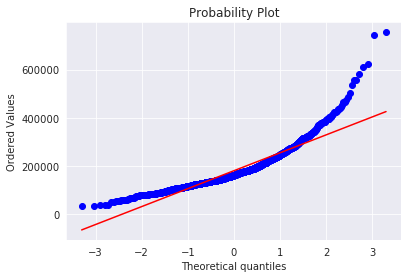

all time is -  10.119940757751465 (sec)
local time is -  10.119385242462158 (sec)


In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from subprocess import check_output
import os
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


#print(os.listdir("../input"))
train = pd.read_csv("input_house_price/train.csv")
test = pd.read_csv("input_house_price/test.csv")

print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea']/train['OverallCond'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea/OverallCond', fontsize=13)
plt.show()

#Data Processing – Outliers

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#Deleting outliers | удаление выбросов
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#My_DS_work
#train = train.drop(train[(train['GrLivArea']/train['OverallCond']>700) & (train['SalePrice']<500000)].index)
#--------------------

#Check the graphic again / построение графика без выбросов
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

#My_DS_work
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea']/train['OverallCond'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea/OverallCond', fontsize=13)
plt.show()
#----------------------------

#Target Variable - 
#SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function / нормализация целевой функции
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution / отрисовка отнормированой цулевой функции
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot / отрисовка QQ
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

tik_local = mytime(tik_local)

In [24]:
train.describe().T

count       mean       std       min        25%        50%  \
MSSubClass    1458.000     56.893    42.329    20.000     20.000     50.000   
LotFrontage   1199.000     69.797    23.203    21.000     59.000     69.000   
LotArea       1458.000  10459.937  9859.198  1300.000   7544.500   9475.000   
OverallQual   1458.000      6.094     1.376     1.000      5.000      6.000   
OverallCond   1458.000      5.576     1.113     1.000      5.000      5.000   
YearBuilt     1458.000   1971.218    30.194  1872.000   1954.000   1972.500   
YearRemodAdd  1458.000   1984.834    20.642  1950.000   1967.000   1994.000   
MasVnrArea    1450.000    102.754   179.442     0.000      0.000      0.000   
BsmtFinSF1    1458.000    438.827   432.969     0.000      0.000    382.000   
BsmtFinSF2    1458.000     46.613   161.421     0.000      0.000      0.000   
BsmtUnfSF     1458.000    567.097   442.087     0.000    223.000    477.500   
TotalBsmtSF   1458.000   1052.537   414.982     0.000    795.250    991.000   
1stFlrSF      1458.000   1158.851   372.039   334.000    882.000   1086.000   
2ndFlrSF      1458.000    345.762   435.424     0.000      0.000      0.000   
LowQualFinSF  1458.000      5.853    48.656     0.000      0.000      0.000   
GrLivArea     1458.000   1510.466   507.879   334.000   1128.500   1461.500   
BsmtFullBath  1458.000      0.424     0.517     0.000      0.000      0.000   
BsmtHalfBath  1458.000      0.058     0.239     0.000      0.000      0.000   
FullBath      1458.000      1.564     0.550     0.000      1.000      2.000   
HalfBath      1458.000      0.382     0.503     0.000      0.000      0.000   
BedroomAbvGr  1458.000      2.866     0.816     0.000      2.000      3.000   
KitchenAbvGr  1458.000      1.047     0.220     0.000      1.000      1.000   
TotRmsAbvGrd  1458.000      6.511     1.616     2.000      5.000      6.000   
Fireplaces    1458.000      0.611     0.642     0.000      0.000      1.000   
GarageYrBlt   1377.000   1978.464    24.683  1900.000   1961.000   1980.000   
GarageCars    1458.000      1.766     0.747     0.000      1.000      2.000   
GarageArea    1458.000    472.050   212.239     0.000    331.500    479.500   
WoodDeckSF    1458.000     94.084   125.350     0.000      0.000      0.000   
OpenPorchSF   1458.000     46.246    65.313     0.000      0.000     24.500   
EnclosedPorch 1458.000     21.984    61.156     0.000      0.000      0.000   
3SsnPorch     1458.000      3.414    29.337     0.000      0.000      0.000   
ScreenPorch   1458.000     15.082    55.793     0.000      0.000      0.000   
PoolArea      1458.000      2.433    38.210     0.000      0.000      0.000   
MiscVal       1458.000     43.549   496.461     0.000      0.000      0.000   
MoSold        1458.000      6.323     2.700     1.000      5.000      6.000   
YrSold        1458.000   2007.816     1.329  2006.000   2007.000   2008.000   
SalePrice     1458.000 180932.919 79495.055 34900.000 129925.000 163000.000   

                     75%        max  
MSSubClass        70.000    190.000  
LotFrontage       80.000    313.000  
LotArea        11600.000 215245.000  
OverallQual        7.000     10.000  
OverallCond        6.000      9.000  
YearBuilt       2000.000   2010.000  
YearRemodAdd    2004.000   2010.000  
MasVnrArea       164.750   1600.000  
BsmtFinSF1       711.000   2188.000  
BsmtFinSF2         0.000   1474.000  
BsmtUnfSF        808.000   2336.000  
TotalBsmtSF     1296.750   3206.000  
1stFlrSF        1390.750   3228.000  
2ndFlrSF         728.000   2065.000  
LowQualFinSF       0.000    572.000  
GrLivArea       1776.000   4476.000  
BsmtFullBath       1.000      3.000  
BsmtHalfBath       0.000      2.000  
FullBath           2.000      3.000  
HalfBath           1.000      2.000  
BedroomAbvGr       3.000      8.000  
KitchenAbvGr       1.000      3.000  
TotRmsAbvGrd       7.000     14.000  
Fireplaces         1.000      3.000  
GarageYrBlt     2002.000   2010.000  
GarageCars         2.000  

In [25]:
# sort the frame by SalePrice and analis it
sort_frame = train.sort_values(by='SalePrice', ascending=False)
sort_frame[-10:]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
812           20  C (all)       66.000     8712   Grvl   NaN      Reg   
1325          30       RM       40.000     3636   Pave   NaN      Reg   
705          190       RM       70.000     5600   Pave   NaN      Reg   
1337          30       RM      153.000     4118   Pave  Grvl      IR1   
710           30       RL       56.000     4130   Pave   NaN      IR1   
30            70  C (all)       50.000     8500   Pave  Pave      Reg   
533           20       RL       50.000     5000   Pave   NaN      Reg   
968           50       RM       50.000     5925   Pave   NaN      Reg   
916           20  C (all)       50.000     9000   Pave   NaN      Reg   
495           30  C (all)       60.000     7879   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
812          Bnk    AllPub    Inside  ...        0    NaN    NaN        Shed   
1325         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
705          Lvl    AllPub    Inside  ...        0    NaN    NaN        Othr   
1337         Bnk    AllPub    Corner  ...        0    NaN    NaN         NaN   
710          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
30           Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
533          Low    AllPub    Inside  ...        0    NaN    NaN         NaN   
968          Lvl    AllPub    Inside  ...        0    NaN   GdWo         NaN   
916          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
495          Lvl    AllPub    Inside  ...        0    NaN   GdWo         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
812       54      6    2010        WD         Alloca      55993  
1325       0      1    2008        WD         Normal      55000  
705     3500      7    2010        WD         Normal      55000  
1337       0      3    2006        WD         Normal      52500  
710        0      7    2008        WD         Normal      52000  
30         0      7    2008        WD         Normal      40000  
533        0      1    2007        WD         Normal      39300  
968        0      5    2009        WD        Abnorml      37900  
916        0     10    2006        WD        Abnorml      35311  
495        0     11    2009        WD        Abnorml      34900  

[10 rows x 80 columns]

In [26]:
sort_frame[:10]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691           60       RL      104.000    21535   Pave   NaN      IR1   
1182          60       RL      160.000    15623   Pave   NaN      IR1   
1169          60       RL      118.000    35760   Pave   NaN      IR1   
898           20       RL      100.000    12919   Pave   NaN      IR1   
803           60       RL      107.000    13891   Pave   NaN      Reg   
1046          60       RL       85.000    16056   Pave   NaN      IR1   
440           20       RL      105.000    15431   Pave   NaN      Reg   
769           60       RL       47.000    53504   Pave   NaN      IR2   
178           20       RL       63.000    17423   Pave   NaN      IR1   
798           60       RL      104.000    13518   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
691          Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
1182         Lvl    AllPub    Corner  ...      555     Ex  MnPrv         NaN   
1169         Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
898          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
803          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1046         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
440          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
769          HLS    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
178          Lvl    AllPub   CulDSac  ...        0    NaN    NaN         NaN   
798          Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
691        0      1    2007        WD         Normal     755000  
1182       0      7    2007        WD        Abnorml     745000  
1169       0      7    2006        WD         Normal     625000  
898        0      3    2010       New        Partial     611657  
803        0      1    2009       New        Partial     582933  
1046       0      7    2006       New        Partial     556581  
440        0      4    2009        WD         Normal     555000  
769        0      6    2010        WD         Normal     538000  
178        0      7    2009       New        Partial     501837  
798        0      7    2009       New        Partial     485000  

[10 rows x 80 columns]

In [27]:
# PoolQC
# MiscFeature
# Alley

list_columns = ['MiscFeature', 'SalePrice']
train[list_columns].loc[train['MiscFeature'].notnull()]

MiscFeature  SalePrice
5           Shed     143000
7           Shed     200000
16          Shed     149000
17          Shed      90000
51          Shed     114500
84          Shed     168500
95          Shed     185000
98          Shed      83000
99          Shed     128950
106         Shed     100000
214         Shed     161750
249         Shed     277000
250         Shed      76500
335         Shed     228950
338         Shed     202500
346         Gar2     151500
392         Shed     106500
439         Shed     110000
499         Shed     120000
502         Shed     140000
510         Shed     164900
539         Shed     272000
589         Shed      79500
611         Shed     148000
626         Shed     139900
634         Shed     144000
705         Othr      55000
725         Shed     120500
733         Shed     131400
760         Shed     127500
766         Shed     196500
767         Shed     160000
786         Shed     139000
794         Shed     194500
800         Shed     200000
812         Shed      55993
813         Shed     157900
867         Shed     129000
873         Othr     133000
878         Shed     148000
890         Shed     122900
912         Shed      88000
953         Shed     172000
1061        Shed      81000
1076        Shed     170000
1083        Shed     160000
1171        Shed     163000
1200        Shed     116050
1210        Shed     189000
1230        Gar2     190000
1252        Shed     130000
1328        Shed     256000
1386        TenC     250000
1457        Shed     266500


 mu = 12.02 and sigma = 0.40



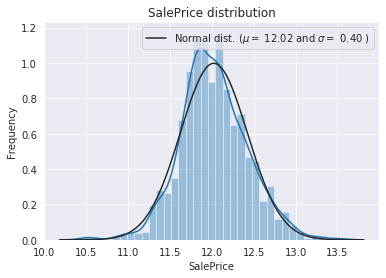

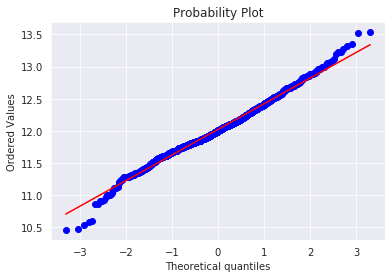

all_data size is : (2917, 79)
              Missing Ratio (% of total all_data)
PoolQC                                     99.691
MiscFeature                                96.400
Alley                                      93.212
Fence                                      80.425
FireplaceQu                                48.680
LotFrontage                                16.661
GarageQual                                  5.451
GarageCond                                  5.451
GarageFinish                                5.451
GarageYrBlt                                 5.451
GarageType                                  5.382
BsmtExposure                                2.811
BsmtCond                                    2.811
BsmtQual                                    2.777
BsmtFinType2                                2.743
BsmtFinType1                                2.708
MasVnrType                                  0.823
MasVnrArea                                  0.788
MSZoning            

In [28]:
#Log-transformation of the target variable / логарифмическое трансформирование целевой функции
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

#The skew seems now corrected and the data appears more normally distributed. / Теперь кажется, что перекос исправлен и данные распределяются более нормально

#Features engineering
#let's first concatenate the train and test data in the same dataframe

ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

#Missing Data analysis
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio (% of total all_data)' :all_data_na})
print(missing_data.head(20))

#f, ax = plt.subplots(figsize=(15, 12))
#plt.xticks(rotation='90')
#sns.barplot(x=all_data_na.index, y=all_data_na)
#plt.xlabel('Features', fontsize=15)
#plt.ylabel('Percent of missing values', fontsize=15)
#plt.title('Percent missing data by feature', fontsize=15)


Practical Statistics & Visualization With Python & Plotly
https://morioh.com/p/70d566c7482d/practical-statistics-visualization-with-python-plotly?fbclid=IwAR0SJs2qcXz_YWAiBoNUaqTAJNbT0NbNbNqoHo4ig0sBQ4_R7KW2Sucxfmg

In [29]:
#My_DS_work
# Take analysis of numeric and categorical columns
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
start_len_num = len(numeric_feats)
print('len of the numeric_feats is: ', start_len_num)

categorical_feats = all_data.dtypes[all_data.dtypes == "object"].index
start_len_cat = len(categorical_feats)
print('len of the categorical_feats is: ', start_len_cat)
print('total len of all_data_feats is: ', len(all_data.columns))

tik_local = mytime(tik_local)

len of the numeric_feats is:  36
len of the categorical_feats is:  43
total len of all_data_feats is:  79
all time is -  15.34973931312561 (sec)
local time is -  5.2297985553741455 (sec)


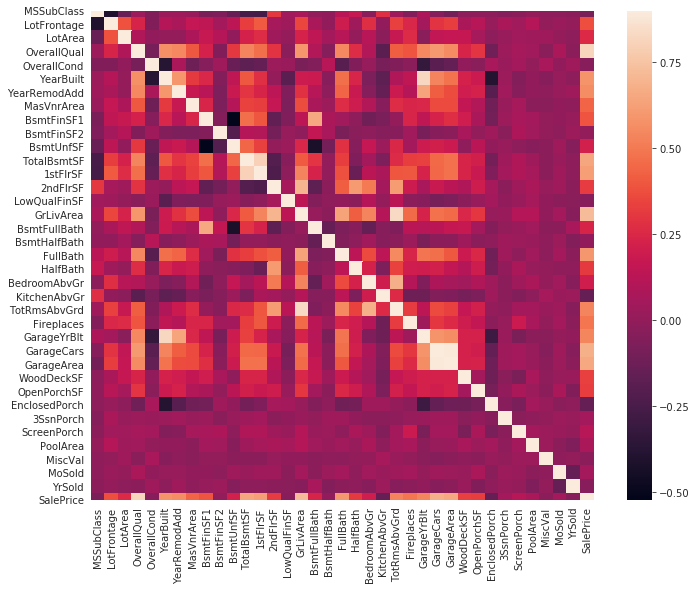

In [30]:
#Data Correlation

#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


In [31]:
#Imputing missing values
#We impute them by proceeding sequentially through features with missing values

all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(missing_data.head())

#-------------------------
#More features engeneering
#Transforming some numerical variables that are really categorical

#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing some features into the categorical variables
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

tik_local = mytime(tik_local)


Empty DataFrame
Columns: [Missing Ratio]
Index: []
all time is -  20.78611969947815 (sec)
local time is -  5.436380386352539 (sec)


In [32]:
# droping columns
col_drop_none = ['Utilities', 'RoofMatle']
col_drop1 = ['Alley', 'PoolQC', 'MiscFeature']
col_drop1407 = ['Street', 'Utilities', 'Condition2', 'RoofMatle', 'Heating']
col_drop1507 = ['LandSlope', 'CentralAir', 'Functional', 'PavedDrive']
col_drop1607 = ['MSZoning', 'LandContour', 'Electrical', 'GarageQual', 'GarageCond']
col_drop1707 = ['Fence']
col_drop1807 = ['LandContour', 'LotConfig', 'BldType', 'ExterCond', 'BsmtCond', 'LowQualFinSF', 'GarageCond']

col_drop = col_drop1 + col_drop1407 + col_drop1507

for i in col_drop_none:
    col_drop.remove(i)
    
for i in col_drop:
    all_data.drop([i], axis=1, inplace=True)

tik_local = mytime(tik_local)

all time is -  20.943114280700684 (sec)
local time is -  0.15699458122253418 (sec)


In [33]:
#My_DS_work
# For example, OverallQual and OverallCond columns are int64 and they have assigned weights 1 - 10
# There are many columns about quality, starting with the “FireplaceQu” column and ending with 
# the “GarageQual” column. 
# These columns can be graduated from very poor to very excellent. For very poor bad we assign weight 1, 
# for very excellent - 10, for None we assign weight 0
"""
    10	Very Excellent
    9	Excellent
    8	Very Good
    7	Good
    6	Above Average
    5	Average
    4	Below Average
    3	Fair
    2	Poor
    1	Very Poor


qual_col = ('ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
           'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',)

qual_values={
    'Ex' : 9,
    'Gd' : 7,
    'TA' : 5,
    'Fa' : 3,
    'Po' : 2,
    'NA' : 0,
    'None' : 0,
}
for col in qual_col:
    all_data[col] = all_data[col].fillna('None')
    
#print(X['ExterQual'])

for col in qual_col:
    all_data[col]=all_data[col].map(qual_values)
    #print(all_data[col][:3])
    print(all_data[col].dtype)
    print(all_data[col].unique())


"""

"\n    10\tVery Excellent\n    9\tExcellent\n    8\tVery Good\n    7\tGood\n    6\tAbove Average\n    5\tAverage\n    4\tBelow Average\n    3\tFair\n    2\tPoor\n    1\tVery Poor\n\n\nqual_col = ('ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', \n           'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC',)\n\nqual_values={\n    'Ex' : 9,\n    'Gd' : 7,\n    'TA' : 5,\n    'Fa' : 3,\n    'Po' : 2,\n    'NA' : 0,\n    'None' : 0,\n}\nfor col in qual_col:\n    all_data[col] = all_data[col].fillna('None')\n    \n#print(X['ExterQual'])\n\nfor col in qual_col:\n    all_data[col]=all_data[col].map(qual_values)\n    #print(all_data[col][:3])\n    print(all_data[col].dtype)\n    print(all_data[col].unique())\n\n\n"

In [34]:
#My_DS_work
# Take analysis of numeric and categorical columns
def columns_len():
    numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
    start_len_num = len(numeric_feats)
    print('len of the numeric_feats is: ', start_len_num)

    categorical_feats = all_data.dtypes[all_data.dtypes == "object"].index
    start_len_cat = len(categorical_feats)
    print('len of the categorical_feats is: ', start_len_cat)
    print('total len of all_data_feats is: ', len(all_data.columns))

columns_len()

len of the numeric_feats is:  32
len of the categorical_feats is:  36
total len of all_data_feats is:  68


In [35]:
# Adding features
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data['TotalSFGarage'] = all_data['TotalSF']+all_data['GarageArea']
all_data['YrMoSold'] = all_data['YrSold'] + all_data['MoSold']
all_data['YrBltAndRemod'] = all_data['YearBuilt'] + all_data['YearRemodAdd']
all_data['Total_sqr_footage'] = (all_data['BsmtFinSF1'] + all_data['BsmtFinSF2'] +
                                 all_data['1stFlrSF'] + all_data['2ndFlrSF'])
all_data['Total_Bathrooms'] = (all_data['FullBath'] + (0.5 * all_data['HalfBath']) +
                               all_data['BsmtFullBath'] + (0.5 * all_data['BsmtHalfBath']))
all_data['Total_porch_sf'] = (all_data['OpenPorchSF'] + all_data['3SsnPorch'] +
                              all_data['EnclosedPorch'] + all_data['ScreenPorch'] +
                              all_data['WoodDeckSF'])
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].astype(str)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].astype(str)
all_data['Fireplaces'] = all_data['Fireplaces'].astype(str)
all_data['GarageCars'] = all_data['GarageCars'].astype(str)
#new features at the 140719
all_data['BltRemod'] = all_data['YearBuilt'].astype(str) + all_data['YearRemodAdd'].astype(str) 
all_data['OverallQualStr'] = all_data['OverallQual'].astype(str)
all_data['YearRemodAddStr'] = all_data['YearRemodAdd'].astype(str)
all_data['BedroomAbvGrStr'] = all_data['BedroomAbvGr'].astype(str)
all_data['TotRmsAbvGrdStr'] = all_data['TotRmsAbvGrd'].astype(str)
all_data['TotRmsStr'] = all_data['TotRmsAbvGrdStr'] + all_data['BedroomAbvGrStr']
all_data['TotRmsNeigStr'] = all_data['TotRmsStr'] + all_data['Neighborhood']
all_data['TotRms'] = all_data['TotRmsAbvGrd'] + all_data['BedroomAbvGr']
all_data['TotRmsNeigStr1'] = all_data['TotRms'].astype(str) + all_data['Neighborhood']
all_data['TotRmsNeigQualStr1'] = all_data['TotRmsNeigStr1'] + all_data['OverallQual'].astype(str)

#all_data[cat_cols].describe()
tik_local = mytime(tik_local)

all time is -  21.635058403015137 (sec)
local time is -  0.6919441223144531 (sec)


In [36]:
cat_cols = [c for c in all_data.columns if all_data[c].dtype.name == 'object']
num_cols   = [c for c in all_data.columns if all_data[c].dtype.name != 'object']

In [37]:

#Label Encoding some categorical variables that may contain information in their ordering set


from sklearn.preprocessing import LabelEncoder
qual_cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'ExterCond','HeatingQC', 
            'ExterQual', 'KitchenQual', 'GarageQual', 'GarageCond']

cols = ['BsmtFinType1', 'BsmtFinType2',  'BsmtExposure', 'GarageFinish', 
        'LotShape',  'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'YrMoSold']

cols_ad = ['BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'GarageCars']

cols_for_del = ['Alley', 'PoolQC', 'MiscFeature', 'Fence']

col_del140719 = ['Street', 'Utilities', 'Condition2', 'RoofMatle', 'Heating']
col_del150719 = ['LandSlope', 'PavedDrive', 'CentralAir', 'Functional']
col_drop1607 = ['MSZoning', 'LandContour', 'Electrical', 'GarageQual', 'GarageCond']

new_cols_cat = ['BltRemod', 'OverallQualStr', 'YearRemodAddStr', 'BedroomAbvGrStr', 'TotRmsAbvGrdStr', 
               'TotRmsStr', 'TotRmsNeigStr', 'TotRmsNeigStr1', 'TotRmsNeigQualStr1']

cols = cols + qual_cols + cols_ad + new_cols_cat

#My_DS_work ver 9 17/06
#cols = categorical_feats
#-----------------


# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

#Adding one more important feature
#Since area related features are very important to determine house prices, we add one more feature which #is the #total area of basement, first and second floor areas of each house

columns_len()
tik_local = mytime(tik_local)

Shape all_data: (2917, 85)
len of the numeric_feats is:  67
len of the categorical_feats is:  18
total len of all_data_feats is:  85
all time is -  22.33564257621765 (sec)
local time is -  0.7005841732025146 (sec)


In [38]:
#Skewed features

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

#Box Cox Transformation of (highly) skewed features

skewness = skewness[abs(skewness) > 0.75]    # My_DS_work - was 0.75 my vers - 0.5
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

#Getting dummy categorical features

all_data = pd.get_dummies(all_data)
print(all_data.shape)

#Getting the new train and test sets.
train = all_data[:ntrain]
test = all_data[ntrain:]
tik_local = mytime(tik_local)



Skew in numerical features: 

There are 36 skewed numerical features to Box Cox transform
(2917, 214)
all time is -  23.369243144989014 (sec)
local time is -  1.0336005687713623 (sec)


In [39]:
columns_len()
# shape        
print('Shape all_data: {}'.format(all_data.shape))

len of the numeric_feats is:  214
len of the categorical_feats is:  0
total len of all_data_feats is:  214
Shape all_data: (2917, 214)


In [49]:
#Modelling
#Import librairies

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
#import lightgbm as lgb
#Define a cross validation strategy

#Validation function
n_folds = 5    #was n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= -cross_val_score(model, train.values, y_train, scoring="mean_absolute_error", cv = kf)
    return(rmse)

#-----------------------
#Base models
#LASSO Regression :
#This model may be very sensitive to outliers. So we need to made it more robust on them. For that we 
#use the #sklearn's Robustscaler() method on pipeline

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

#Elastic Net Regression :  again made robust to outliers

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3))

#Kernel Ridge Regression :

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# was KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
# was tuning KRR = KernelRidge(alpha=0.9, kernel='polynomial', degree=1, coef0=2)

#Gradient Boosting Regression :  With huber loss that makes it robust to outliers

GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=100, subsample=1.0, 
          criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
          min_weight_fraction_leaf=0.0, max_depth=4, min_impurity_decrease=0.0, 
          min_impurity_split=None, init=None, random_state=5, max_features='sqrt', 
          alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', 
          validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)


#XGBoost

model_dtr = DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=4, 
                                  min_samples_split=2, min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0, max_features=None, 
                                  random_state=None, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, min_impurity_split=None, 
                                  presort=False)


#LightGBM :

model_lgb = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, 
                         l1_ratio=0.15, fit_intercept=True, max_iter=1000, 
                         tol=0.001, shuffle=True, verbose=0, epsilon=0.1, 
                         random_state=None, learning_rate='invscaling', 
                         eta0=0.01, power_t=0.25, early_stopping=False, 
                         validation_fraction=0.1, n_iter_no_change=5, 
                         warm_start=False, average=False)

#AdaBoostRegressor + DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
rng = np.random.RandomState(1)
regr_2 = AdaBoostRegressor(model_dtr,n_estimators=300, random_state=rng)

# VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
reg1 = GBoost
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])


# ANOVA SVM-C
from sklearn import svm
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
# 1) anova filter, take 3 best ranked features
anova_filter = SelectKBest(f_regression, k=26)
clf = svm.LinearSVC()
anova_svm = make_pipeline(anova_filter, clf)




In [50]:
#Base models scores
#Let's see how these base models perform on the data by evaluating the cross-validation rmsle error
print('scoring MSE')
score = rmsle_cv(lasso)
str_lasso = "\nLasso score: {:.4f} ({:.4f})".format(score.mean(), score.std())
print(str_lasso)

score = rmsle_cv(ENet)
str_enet = "ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std())
print(str_enet)

score = rmsle_cv(KRR)
str_krr = "Kernel Ridge score: {:.4f} ({:.4f})".format(score.mean(), score.std())
print(str_krr)

score = rmsle_cv(GBoost)
str_gboost = "Gradient Boosting score: {:.4f} ({:.4f})".format(score.mean(), score.std())
print(str_gboost)

score = rmsle_cv(model_dtr)
str_dtr = "Xgboost score: {:.4f} ({:.4f})".format(score.mean(), score.std())
print(str_dtr)

score = rmsle_cv(model_lgb)
str_lgbm = "LGBM score: {:.4f} ({:.4f})" .format(score.mean(), score.std())
print(str_lgbm)

score = rmsle_cv(regr_2)
str_regr_2 = "regr_2: {:.4f} ({:.4f})" .format(score.mean(), score.std())
print(str_regr_2)

score = rmsle_cv(ereg)
str_ereg = "ereg: {:.4f} ({:.4f})" .format(score.mean(), score.std())
print(str_ereg)

score = rmsle_cv(anova_svm)
str_anova_svm = "regr_2: {:.4f} ({:.4f})" .format(score.mean(), score.std())
print(str_anova_svm)

tik_local = mytime(tik_local)

scoring MSE

Lasso score: 0.1129 (0.0071)
ElasticNet score: 0.1130 (0.0071)
Kernel Ridge score: 0.2563 (0.0096)
Gradient Boosting score: 0.1291 (0.0065)
Xgboost score: 0.1886 (0.0097)
LGBM score: 15304605355951292.0000 (6156733102420427.0000)
regr_2: 0.1416 (0.0048)
regr_2: 0.1198 (0.0061)


/opt/conda/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/conda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


ValueError: Unknown label type: 'continuous'

In [42]:
#Stacking models
#Simplest Stacking approach : Averaging base models

#We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our 
#model and also to laverage encapsulation and code reuse (inheritance)

#Averaged base models class

class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

#Averaged base models score
#We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models #in the mix.

averaged_models = AveragingModels(models = (ENet, GBoost, model_xgb, lasso))  # was - ENet, GBoost, KRR, lasso

score = rmsle_cv(averaged_models)
str_avr_model = " Averaged base models score: {:.4f} ({:.4f})".format(score.mean(), score.std())
print(str_avr_model)
tik_local = mytime(tik_local)



 Averaged base models score: 0.1206 (0.0058)
all time is -  164.35390663146973 (sec)
local time is -  29.380882263183594 (sec)


In [43]:
#Stacking averaged Models Class

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=15):      #was n_folds=5
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

#---------------------------
#Stacking Averaged models Score
#To make the two approaches comparable (by using the same number of models) , we just average Enet KRR 
#and Gboost, then we add lasso as meta-model.

stacked_averaged_models = StackingAveragedModels(base_models = (ENet, ENet, GBoost, KRR), 
                                                 #was ENet, GBoost, KRR
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
str_stacking = "Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std())
print(str_stacking)

tik_local = mytime(tik_local)

Stacking Averaged models score: 0.1111 (0.0066)
all time is -  521.9112548828125 (sec)
local time is -  357.5573482513428 (sec)


In [44]:
#Ensembling StackedRegressor, XGBoost and LightGBM
#We add XGBoost and LightGBM to the StackedRegressor defined previously.
#We first define a rmsle evaluation function

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def rmae(y, y_pred):
    return mean_absolute_error(y, y_pred)


#My_DS_work
print('Shape all_data: {}'.format(all_data.shape))
print(str_lasso)
print(str_enet)
print(str_krr)
print(str_gboost)
print(str_xgb)
print(str_lgbm)
print(str_avr_model)
print(str_stacking)

#Final Training and Prediction

#StackedRegressor

stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred), ' str_ctackregr_rmsle')

tik_local = mytime(tik_local)

#XGBoost:

model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred), ' str_xgb_rmsle ')

tik_local = mytime(tik_local)

#LightGBM:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred), 'str_lgb_rmsle ')

tik_local = mytime(tik_local)

'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print('stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15')
#print(rmsle(y_train,stacked_train_pred*0.7 +xgb_train_pred*0.15 + lgb_train_pred*0.15 ))
print(rmsle(y_train,(stacked_train_pred*0.7 +xgb_train_pred*0.15 + lgb_train_pred*0.15 )))

tik_local = mytime(tik_local)

print('RMAE')
print(rmae(y_train, stacked_train_pred), ' str_stackregr_rmae')
print(rmae(y_train, xgb_train_pred), ' str_xgb_rmae ')
print(rmae(y_train, lgb_train_pred), 'str_lgb_rmae ')
#print(rmae(y_train,stacked_train_pred*0.7 +xgb_train_pred*0.15 + lgb_train_pred*0.15 ))
print(rmae(y_train,(stacked_train_pred*0.7 +xgb_train_pred*0.15 + lgb_train_pred*0.15)))



Shape all_data: (2917, 214)

Lasso score: 0.1129 (0.0071)
ElasticNet score: 0.1130 (0.0071)
Kernel Ridge score: 0.2563 (0.0096)
Gradient Boosting score: 0.1291 (0.0065)
Xgboost score: 0.1886 (0.0097)
LGBM score: 8316235241993832.0000 (6125470443436869.0000)
 Averaged base models score: 0.1206 (0.0058)
Stacking Averaged models score: 0.1111 (0.0066)
0.09243774568117173  str_ctackregr_rmsle
all time is -  616.5929527282715 (sec)
local time is -  94.68169784545898 (sec)
0.1716356663934519  str_xgb_rmsle 
all time is -  618.9144027233124 (sec)
local time is -  2.3214499950408936 (sec)
2616773249876894.0 str_lgb_rmsle 
all time is -  619.4792613983154 (sec)
local time is -  0.5648586750030518 (sec)
RMSLE score on train data:
stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15
392515987481534.0
all time is -  619.491623878479 (sec)
local time is -  0.012362480163574219 (sec)
RMAE
0.06395331122040297  str_stackregr_rmae
0.11988901382553391  str_xgb_rmae 
2498338415261824.0 str_lgb_rmae 
3747507

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in expm1


In [45]:
#Ensemble prediction

ensemble = stacked_pred*0.7 + xgb_pred*0.15 + lgb_pred*0.15 

# was ensemble = stacked_pred*0.7 + xgb_pred*0.15 + lgb_pred*0.15

#Submission

sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

print('finish')
print('y_pred ',xgb_pred[:5])
print('y_targ ', np.expm1(y_train)[:5])
print(xgb_pred[:5]- np.expm1(y_train)[:5])
print('[-79284.421875 -18825.96875  -38645.65625   58644.84375  -65016.03125 ] - good result')



finish
y_pred  [139000.         139000.         179049.93716873 179049.93716873
 179049.93716873]
y_targ  [208500. 181500. 223500. 140000. 250000.]
[-69500.         -42500.         -44450.06283127  39049.93716873
 -70950.06283127]
[-79284.421875 -18825.96875  -38645.65625   58644.84375  -65016.03125 ] - good result


In [46]:
#print(xgb_pred.shape)
#print(np.expm1(y_train).shape)
xgb_pred = xgb_pred[:1458]
ensemble = ensemble[:1458]
pred_delta = np.expm1(y_train)- ensemble
#print(xgb_pred.shape)
predict = pd.DataFrame(list(zip(ensemble, xgb_pred, np.expm1(y_train), pred_delta)))

print(predict.head(15))

     0          1          2    3
0  inf 139000.000 208500.000 -inf
1  inf 139000.000 181500.000 -inf
2  inf 179049.937 223500.000 -inf
3  inf 179049.937 140000.000 -inf
4  inf 179049.937 250000.000 -inf
5  inf 179049.937 143000.000 -inf
6  inf 155000.000 307000.000 -inf
7  inf 179049.937 200000.000 -inf
8  inf 210000.000 129900.000 -inf
9  inf 120500.000 118000.000 -inf
10 inf 210000.000 129500.000 -inf
11 inf  88498.588 345000.000 -inf
12 inf 120500.000 144000.000 -inf
13 inf 155000.000 279500.000 -inf
14 inf 120500.000 157000.000 -inf
